In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [17]:
df = pd.read_csv("Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [18]:
X = df.iloc[:].values

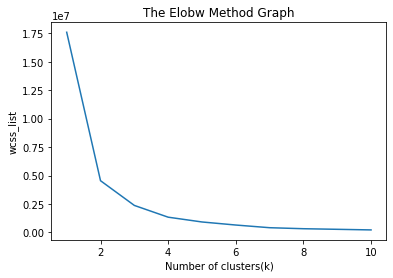

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
wcss_list= []  

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [20]:
def euclidian(a, b):
    return np.sum((a-b) ** 2)

In [21]:
def fit(x, k):
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x[idx, :]
    output = []
    for i in range(len(x)):
        dist = []
        for j in range(k):
            dist.append(euclidian(centroids[j], x[i]))
        dist = np.array(dist)
        m = np.argmin(dist)
        output.append(m)
        centroids[m] = np.mean([centroids[m], x[i]], axis=0)
        
    output = np.array(output)
    return output

In [22]:
y_pred = fit(X, 4)
print(y_pred)

[3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 3 3 2 2 3 3 2 3 2 2 2
 2 2 0 0 2 2 0 2 2 2 2 2 3 2 3 3 3 2 2 2 3 3 1 0 1 0 1 1 0 1 1 0 0 0 1 1 2
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 2 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 2 2 1 0
 0 1 1 1 1 0 0 0 1 2 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 2 2 1]


In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++')  
y_predict= kmeans.fit_predict(X)

In [24]:
print(y_predict)

[0 0 2 2 3 2 2 2 0 0 2 2 2 0 2 2 2 0 2 3 3 3 0 0 3 3 2 2 0 0 2 2 0 2 0 0 0
 0 0 3 3 0 0 3 0 0 0 0 0 2 0 2 2 2 0 0 0 2 2 1 3 1 3 1 1 3 1 1 3 3 0 1 1 0
 0 1 1 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 1 1 0 3 1 3 1 3 1 1 1 3 1 1 1 1 3 1
 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 1 3 3 3 3 1 3 3 3 3 1 1 3 3 1 3
 3 1 1 1 1 3 3 3 1 0 3 3 1 3 1 3 3 1 3 3 3 3 1 1 3 3 3 3 3 1]


In [25]:
print(len(X))
print(len(y_pred))

178
178


In [26]:
c = 0
for i in range(len(y_pred)):
    if(y_pred[i] == y_predict[i]):
        c = c + 1
print(c)

61
